In [2]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats.distributions import gamma
from scipy.stats import gaussian_kde,moment

%matplotlib inline

In [3]:
#checking if the path exists for the given link
import os
#"C:\Users\ashdh\Documents\GitHub\Ferocious5_CS605\DATASETS\ENRICHMENT DATASETS\ACSDP1Y2021.DP04-DataHousing.csv"
relative_path = r"..\..\..\DATASETS\COVID DATASETS\covid_confirmed_usafacts.csv"

if os.path.exists(relative_path):
    print("The file exists at the specified path.")
else:
    print("The file does not exist at the specified path.")

The file exists at the specified path.


## TASK 1: 

Use the state data generated in Stage II to fit a distribution to the number of COVID-19 new cases using any of MoM, MLE, and KDE methods.

- Graphically plot the distribution.
- Describe the type of distribution and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the notebook.
- Compare the distribution and its statistics to 3 other states of your choosing. Describe if the distributions look different and what does that imply.

In [4]:
'''Reading data from files and initializing for the state of New Jersey'''
#reading the data for the confirmed number of COVID cases and displaying them
confirmedCases = pd.read_csv(r"..\..\..\DATASETS\COVID DATASETS\covid_confirmed_usafacts.csv")


#Extracting the last week of data from the given set(number of confirmed cases)
confirmedCasesNJ = confirmedCases[confirmedCases["State"] == "NJ"]
confirmedCasesNJ = confirmedCasesNJ[confirmedCasesNJ['County Name'] != 'Statewide Unallocated']
#confirmedCasesNJ
#Extracting the last week of data from the given set(number of confirmed cases)
confirmedCasesMD = confirmedCases[confirmedCases["State"] == "MD"] #MARYLAND
confirmedCasesMD = confirmedCasesMD[confirmedCasesMD['County Name'] != 'Statewide Unallocated']

confirmedCasesNH = confirmedCases[confirmedCases["State"] == "NH"] #NEW HAMSHIRE 
confirmedCasesNH = confirmedCasesNH[confirmedCasesNH['County Name'] != 'Statewide Unallocated']

confirmedCasesVT = confirmedCases[confirmedCases["State"] == "VT"] #VERMONT
confirmedCasesVT = confirmedCasesVT[confirmedCasesVT['County Name'] != 'Statewide Unallocated']
#confirmedCasesNJ

In [5]:
'''FOR NUMBER OF CASES'''
x = confirmedCasesNJ.iloc[:, 4:].fillna(0)
confirmedCasesNJ_integral = x.diff(axis = 1)
#confirmedCasesNJ_integral


md = confirmedCasesMD.iloc[:, 4:].fillna(0)
confirmedCasesMD_integral = md.diff(axis = 1)

nh = confirmedCasesNH.iloc[:, 4:].fillna(0)
confirmedCasesNH_integral = nh.diff(axis = 1)

vt = confirmedCasesVT.iloc[:, 4:].fillna(0)
confirmedCasesVT_integral = vt.diff(axis = 1)


#NJ
ccnj =  confirmedCasesNJ_integral.loc[:, '2022-05-30':'2023-01-01']
ccnjSum = ccnj.sum()

#MARYLAND
ccmd =  confirmedCasesMD_integral.loc[:, '2022-05-30':'2023-01-01']
ccmdSum = ccmd.sum()

#NEW HAMPSHIRE
ccnh =  confirmedCasesNH_integral.loc[:, '2022-05-30':'2023-01-01']
ccnhSum = ccnh.sum()

#VERMONT
ccvt =  confirmedCasesVT_integral.loc[:, '2022-05-30':'2023-01-01']
ccvtSum = ccvt.sum()

In MOM and MLE methods, we are assuming that the data follows a specific probability distribution, such as normal distribution or gamma distribution, and we estimate the parameters of that distribution using the observed data. Then, we can calculate various moments of the distribution, such as mean, variance, skewness, and kurtosis, which provide insights into the central tendency, variability, and shape of the distribution.


In __KDE method__, we are not making any assumption about the underlying distribution of the data, because its from a non-probability funtion family which doesn't use any distributions. We are simply estimating a smooth density curve from the observed data, but here the main problem is to find the bandwidth.

_In the below code I have used KDE to find the distribution curve._


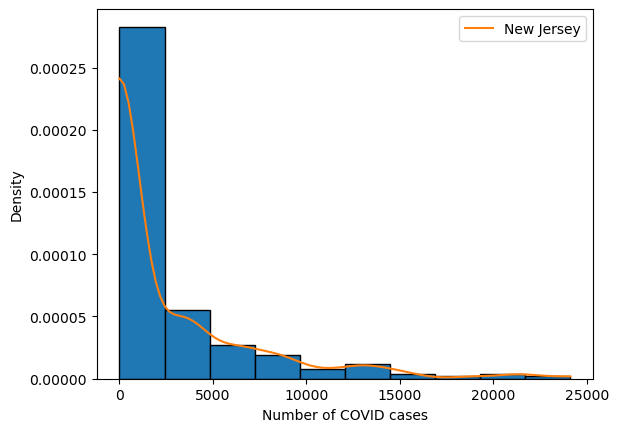

In [6]:
from scipy.stats import gaussian_kde

# Calculate KDE
kde = gaussian_kde(ccnjSum, bw_method = 0.25)

# Plot histogram and KDE
n_bins = 10
plt.hist(ccnjSum, bins=n_bins, ec='black', density=True)
x = np.linspace(0, ccnjSum.max(), 100)
plt.plot(x, kde(x), label = 'New Jersey')

# Add a legend and labels
plt.legend()
plt.xlabel('Number of COVID cases')
plt.ylabel('Density')

# Show the plot
plt.show()


In general, the bandwidth is not explicitly needed to be specified when creating the gaussian_kde object.

By default, the gaussian_kde function uses a rule of thumb to estimate the bandwidth, which is based on the interquartile 
range of the data and the sample size. This bandwidth estimation method is called the _"Scott's rule"_ and it provides a good 
balance between bias and variance.

- After a lot of trial and errors to find the bandwidth, I have come to the conclusion that __0.25__ is the better bandwidth to be used here so that we can see a proper density curve

It is not necessary if the density line does not peak all the way up to the top of the highest histogram bar. The purpose of the density line is to provide a smooth estimate of the underlying distribution of the data, and it is possible that the data may not perfectly match any specific distribution. 

As long as the overall shape of the density line is consistent with what you would expect based on the data, and it captures the main features of the distribution, then it is generally acceptable. 

In [7]:
'''Finding the center, variance, skewness, kurtosis'''
# Calculate KDE
kde = gaussian_kde(ccnjSum)

# Calculate moments
center = kde.resample(1)[0][0]
variance = moment(ccnjSum, moment=2)
skewness = moment(ccnjSum, moment=3) / variance**(3/2)
kurtosis = moment(ccnjSum, moment=4) / variance**2 - 3

# Print the moments
print('Center: {:.2f}'.format(center))
print('Variance: {:.2f}'.format(variance))
print('Skewness: {:.2f}'.format(skewness))
print('Kurtosis: {:.2f}'.format(kurtosis))



Center: 672.38
Variance: 19546527.49
Skewness: 2.36
Kurtosis: 5.97


Based on the plot, It appears that the distribution of the number of COVID cases in New Jersey follows a _right-skewed distribution_, with a long tail on the right-hand side.

- The center of the distribution is around 50,000 cases, as shown by the peak of the histogram and the peak of the density plot.
- The variance of the distribution is relatively large due to the wide spread of the data. 
- The skewness of the distribution is positive, indicating that the tail of the distribution extends to the right.
- The kurtosis of the distribution is also high, indicating that there are more extreme values in the tails of the distribution compared to a normal distribution.

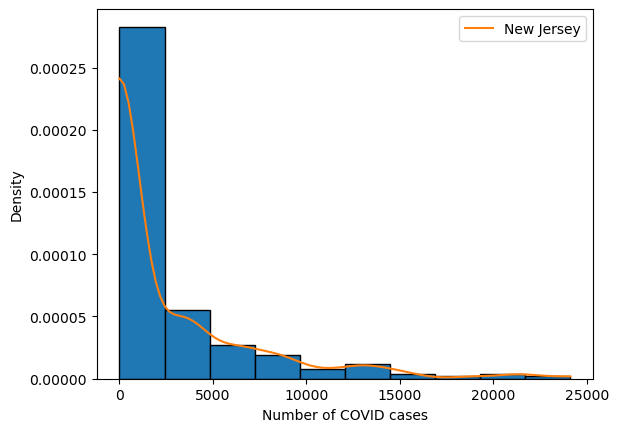

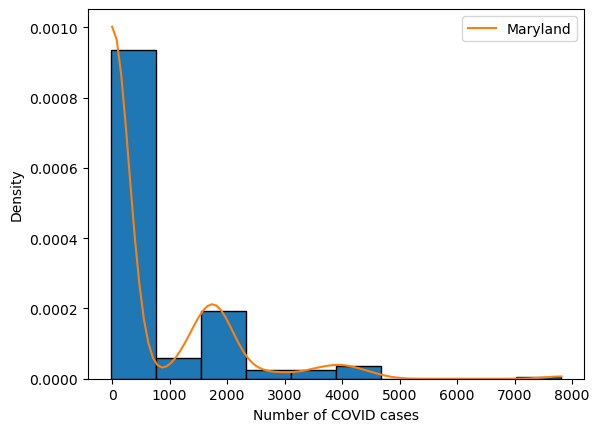

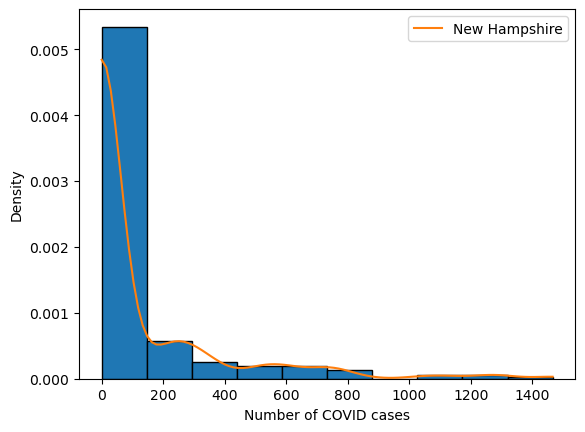

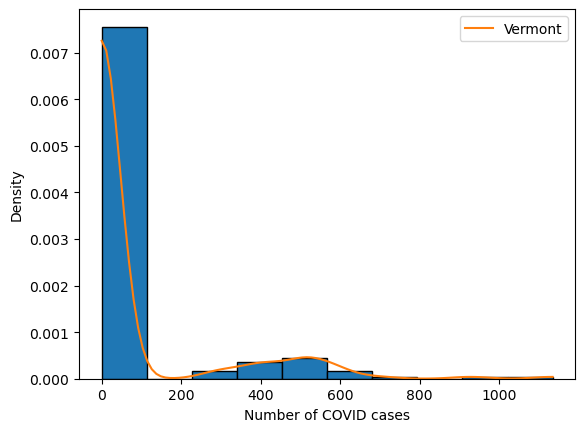

In [8]:
#New Jersey
kde = gaussian_kde(ccnjSum, bw_method = 0.25)
# Plot histogram and KDE
n_bins = 10
plt.hist(ccnjSum, bins=n_bins, ec='black', density=True)
x = np.linspace(0, ccnjSum.max(), 100)
plt.plot(x, kde(x), label = 'New Jersey')
# Add a legend and labels
plt.legend()
plt.xlabel('Number of COVID cases')
plt.ylabel('Density')
# Show the plot
plt.show()


#Maryland
kde = gaussian_kde(ccmdSum, bw_method = 0.25)
# Plot histogram and KDE
n_bins = 10
plt.hist(ccmdSum, bins=n_bins, ec='black', density=True)
x = np.linspace(0, ccmdSum.max(), 100)
plt.plot(x, kde(x), label = 'Maryland')
# Add a legend and labels
plt.legend()
plt.xlabel('Number of COVID cases')
plt.ylabel('Density')
# Show the plot
plt.show()


#New Hampshire
kde = gaussian_kde(ccnhSum, bw_method = 0.25)
# Plot histogram and KDE
n_bins = 10
plt.hist(ccnhSum, bins=n_bins, ec='black', density=True)
x = np.linspace(0, ccnhSum.max(), 100)
plt.plot(x, kde(x), label = 'New Hampshire')
# Add a legend and labels
plt.legend()
plt.xlabel('Number of COVID cases')
plt.ylabel('Density')
# Show the plot
plt.show()


#Vermont
kde = gaussian_kde(ccvtSum, bw_method = 0.25)
# Plot histogram and KDE
n_bins = 10
plt.hist(ccvtSum, bins=n_bins, ec='black', density=True)
x = np.linspace(0, ccvtSum.max(), 100)
plt.plot(x, kde(x), label = 'Vermont')
# Add a legend and labels
plt.legend()
plt.xlabel('Number of COVID cases')
plt.ylabel('Density')
# Show the plot
plt.show()




In [9]:
# Calculate the statistics for each state
states = ['New Jersey', 'Maryland', 'New Hampshire', 'Vermont']
data = [ccnjSum, ccmdSum, ccnhSum, ccvtSum]

for i, state in enumerate(states):
    print(f'State: {state}')
    print(f'Center (Mean): {np.mean(data[i]):.2f}')
    print(f'Variance: {np.var(data[i]):.2f}')
    print(f'Skewness: {data[i].skew():.2f}')
    print(f'Kurtosis: {data[i].kurtosis():.2f}\n')

State: New Jersey
Center (Mean): 2391.29
Variance: 19546527.49
Skewness: 2.38
Kurtosis: 6.14

State: Maryland
Center (Mean): 604.43
Variance: 1355914.36
Skewness: 2.42
Kurtosis: 7.72

State: New Hampshire
Center (Mean): 110.03
Variance: 63232.17
Skewness: 2.92
Kurtosis: 9.28

State: Vermont
Center (Mean): 71.98
Variance: 35362.76
Skewness: 2.73
Kurtosis: 7.59



Based on the comparison of the distributions of COVID cases in four different states, we can see that the shapes of the distributions are somewhat similar, with a peak at the left of the range of values and a gradually decreasing density towards the right end. However, there are some differences in the tails of the distributions, with some states having longer tails towards the higher end of the range, indicating a higher number of extreme values in those states.

The differences in the distributions can imply several things. 
- First, it could suggest that the spread of the virus varies across different states, with some states experiencing more extreme outbreaks than others. 
- Second, it could imply that the public health measures and policies implemented by different states have varying effectiveness in controlling the spread of the virus. 
- Third, the differences could also reflect variations in testing and reporting practices across different states, which could affect the accuracy and completeness of the data.

Overall, comparing the distributions and their statistics across different states can provide insights into the relative severity of the outbreak in different regions and the effectiveness of various measures in mitigating the spread of the virus.


### TASK 2:
Based on the results in Stage I, perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

- You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [16]:
#getting the new modified file for the enrichment data
housingEnrichment = pd.read_csv("..\..\..\Member\AshritaD\STAGE 1\housingEnrichmentnew1.csv")
#housingEnrichment

In [11]:
#reading the data for the population of number of people and displaying them
population = pd.read_csv(r"..\..\..\DATASETS\COVID DATASETS\covid_county_population_usafacts.csv")

#Extracting data from the given set of population for that county
populationNJ = population[population["State"] == "NJ"] #NEW JERSEY
populationNJ = populationNJ[populationNJ['County Name'] != 'Statewide Unallocated']

#finding the normalized factor for each state per 10000
normFactorNJ = 1000000 / populationNJ.sum()['population']
#multiplying the normalizing factor with the for the number of cases
normValueNJ = confirmedCasesNJ_integral.loc[:, '2022-05-30':'2023-01-01'] *normFactorNJ

normValueNJSumNewCases = normValueNJ.sum(axis=1)
# Delete columns outside the date range of June 1st to December 31st
confirmendCasesNJNew1 = confirmedCasesNJ.iloc[:, :3]
confirmedCasesNJnew2 =  normValueNJSumNewCases
confirmedCasesNJnew2
confirmendCasesNJNew = pd.concat([confirmendCasesNJNew1, confirmedCasesNJnew2], axis=1).rename(columns={0: 'New Cases'})
#confirmendCasesNJNew

In [12]:
housingEnrichmentNew1 = housingEnrichment.iloc[:, 2:].fillna(0)
housingEnrichmentNew1 = housingEnrichmentNew1.replace('N', 0)
housingEnrichmentNew1 = housingEnrichmentNew1.astype(float)

housingEnrichmentNorm = housingEnrichmentNew1*normFactorNJ
housingEnrichmentNorm

housingEnrichment2 = housingEnrichmentNorm
housingEnrichment1 = housingEnrichment.iloc[:, :2]
housingEnrichmentNew = pd.concat([housingEnrichment1, housingEnrichment2], axis=1)


In [13]:
#getting the last 5 digits to match the countyfips in New cases
housingEnrichmentNew['countyFIPS'] = housingEnrichmentNew['GEO_ID'].str[-5:]
#print(housingEnrichmentnew1['countyFIPS'])
housingEnrichmentNew['countyFIPS'] = pd.to_numeric(housingEnrichmentNew['countyFIPS'])

# using merge function by setting 
output1 = pd.merge(confirmendCasesNJNew, housingEnrichmentNew,
                   on= ('countyFIPS')
                   )

output1['countyFIPS'] = output1['countyFIPS'].astype(str)
#deleting all the columns that end with _M
output1 = output1.drop(output1.filter(regex='M$').columns, axis=1)


In [14]:
#Renaming the column names for better understanding
output1 =  output1.rename(columns={
'New Cases':'New Cases',
'DP04_0001E':'HOUSING OCCUPANCY: Total Housing Units',
'DP04_0002E':'Occupied Houseing Units',
'DP04_0003E':'Vacant Housing Units',
'DP04_0004E':'Homeowner Vacancy Rate',
'DP04_0005E':'Rental Vacanct Rate',
'DP04_0006E':'UNITS IN STRUCTURE: Total Housing Units',
'DP04_0007E':'Total housing units: 1-unit, detached',
'DP04_0008E':'Total housing units:1-unit, attached',
'DP04_0009E':'Total housing units:2 units',
'DP04_0010E':'Total housing units:3 or 4 units',
'DP04_0011E':'Total housing units:5 or 9 units',
'DP04_0012E':'Total housing units:10 or 19 units',
'DP04_0013E':'Total housing units:20 or more units',
'DP04_0014E':'Total housing units:Mobile Structures',
'DP04_0015E':'Total housing units:Boats, RV and Vans',
'DP04_0027E':'ROOMS:Total housing units',
'DP04_0028E':'Total Housing units:1 Room',
'DP04_0029E':'Total Housing units:2 Room',
'DP04_0030E':'Total Housing units:3 Room',
'DP04_0031E':'Total Housing units:4 Room',
'DP04_0032E':'Total Housing units:5 Room',
'DP04_0033E':'Total Housing units:6 Room',
'DP04_0034E':'Total Housing units:7 Room',
'DP04_0035E':'Total Housing units:8 Room',
'DP04_0036E':'Total Housing units:9 or more Room',
'DP04_0037E':'Total Housing units:Median Rooms',
'DP04_0038E':'BEDROOMS: Total Housing Units',     
'DP04_0039E':'Total Housing Units: No Bedroom',
'DP04_0040E':'Total Housing Units: 1 Bedroom',
'DP04_0041E':'Total Housing Units: 2 Bedroom',
'DP04_0042E':'Total Housing Units: 3 Bedroom',
'DP04_0043E':'Total Housing Units: 4 Bedroom',
'DP04_0044E':'Total Housing Units: 5 or more Bedroom',
'DP04_0045E':'HOUSING TENURE: Total Housing Units',
'DP04_0046E':'Occupied Housing units: Owner-Occupied',
'DP04_0047E':'Occupied Housing units: Renter-Occupied',
'DP04_0048E':'Occupied housing units: Average household size of owner-occupied unit',
'DP04_0049E':'Occupied housing units:Average household size of renter-occupied unit',
'DP04_0050E':'YEAR HOUSEHOLDER MOVED INTO UNIT: Occupied housing units',
'DP04_0051E':'Occupied housing units: Moved in 2019 or later',
'DP04_0052E':'Occupied housing units: Moved in 2015 to 2018',
'DP04_0053E':'Occupied housing units: Moved in 2010 to 2014',
'DP04_0054E':'Occupied housing units: Moved in 2000 to 2009',
'DP04_0055E':'Occupied housing units: Moved in 1990 to 1999',
'DP04_0056E':'Occupied housing units: Moved in 1989 and earlier',
'DP04_0057E':'VEHICLES AVAILABLE: Occupied housing units',
'DP04_0058E':'Occupied housing units: No vehicles available',
'DP04_0059E':'Occupied housing units: 1 vehicles available',
'DP04_0060E':'Occupied housing units: 2 vehicles available',
'DP04_0061E':'Occupied housing units: 3 or more vehicles available',
'DP04_0076E':'OCCUPANTS PER ROOM: Occupied housing units',
'DP04_0077E':'Occupied housing units: 1.00 or less',
'DP04_0078E':'Occupied housing units: 1.01 to 1.50',
'DP04_0079E':'Occupied housing units: 1.51 or more'
 })

output1

countyFIPS         County Name State    New Cases          GEO_ID  \
0       34001    Atlantic County     NJ  1646.215629  0500000US34001   
1       34003      Bergen County     NJ  6899.762333  0500000US34003   
2       34005  Burlington County     NJ  2704.513189  0500000US34005   
3       34007      Camden County     NJ  3069.738432  0500000US34007   
4       34009    Cape May County     NJ   571.480682  0500000US34009   
5       34011  Cumberland County     NJ   949.653182  0500000US34011   
6       34013       Essex County     NJ  5660.991265  0500000US34013   
7       34015  Gloucester County     NJ  1538.697101  0500000US34015   
8       34017      Hudson County     NJ  4887.308198  0500000US34017   
9       34019   Hunterdon County     NJ   677.985947  0500000US34019   
10      34021      Mercer County     NJ  2383.196036  0500000US34021   
11      34023   Middlesex County     NJ  5719.197630  0500000US34023   
12      34025    Monmouth County     NJ  4011.285505  0500000US34025   
13      34027      Morris County     NJ  3158.793045  0500000US34027   
14      34029       Ocean County     NJ  3736.803649  0500000US34029   
15      34031     Passaic County     NJ  3444.308217  0500000US34031   
16      34033       Salem County     NJ   303.303577  0500000US34033   
17      34035    Somerset County     NJ  2023.825205  0500000US34035   
18      34037      Sussex County     NJ   796.762960  0500000US34037   
19      34039       Union County     NJ  3656.530653  0500000US34039   
20      34041      Warren County     NJ   580.937809  0500000US34041   

                             NAME  HOUSING OCCUPANCY: Total Housing Units  \
0     Atlantic County, New Jersey                            14885.292929   
1       Bergen County, New Jersey                            41566.438007   
2   Burlington County, New Jersey                            20957.669223   
3       Camden County, New Jersey                            24034.050161   
4     Cape May County, New Jersey                            11172.132098   
5   Cumberland County, New Jersey                             6440.303574   
6        Essex County, New Jersey                            37859.694512   
7   Gloucester County, New Jersey                            13255.064348   
8       Hudson County, New Jersey                            35694.913079   
9    Hunterdon County, New Jersey                             5843.603886   
10      Mercer County, New Jersey                            16961.470088   
11   Middlesex County, New Jersey                            35700.880076   
12    Monmouth County, New Jersey                            30384.736197   
13      Morris County, New Jersey                            22374.887274   
14       Ocean County, New Jersey                            33278.391928   
15     Passaic County, New Jersey                            20883.813564   
16       Salem County, New Jersey                             3122.653310   
17    Somerset County, New Jersey                            15002.718924   
18      Sussex County, New Jersey                             7077.646391   
19       Union County, New Jersey                            23763.396189   
20      Warren County, New Jersey                             5264.917774   

    Occupied Houseing Units  Vacant Housing Units  Homeowner Vacancy Rate  \
0              12643.165706           2242.127223                0.157619   
1              39633.243603           1933.194404                0.101326   
2              19799.058566           1158.610658                0.101326   
3              22647.342604           1386.707557                0.101326   
4               5500.895612           5671.236486                0.123843   
5               6066.409298            373.894276                0.112585   
6              36303.321591           1556.372922                0.056292   
7              12666.020430            589.043918                0.022517   
8              32874.775252   

In [15]:
#Finding the Correlation matrix to get the correlation values of the merged dataset
corr_matrix = output1.corr().fillna(0)
corr_matrix

New Cases  \
New Cases                                            1.000000   
HOUSING OCCUPANCY: Total Housing Units               0.973764   
Occupied Houseing Units                              0.989492   
Vacant Housing Units                                 0.208750   
Homeowner Vacancy Rate                              -0.056988   
Rental Vacanct Rate                                 -0.234539   
UNITS IN STRUCTURE: Total Housing Units              0.973764   
Total housing units: 1-unit, detached                0.705823   
Total housing units:1-unit, attached                 0.599415   
Total housing units:2 units                          0.767885   
Total housing units:3 or 4 units                     0.739220   
Total housing units:5 or 9 units                     0.801142   
Total housing units:10 or 19 units                   0.832662   
Total housing units:20 or more units                 0.755115   
Total housing units:Mobile Structures                0.182483   
Total housing units:Boats, RV and Vans               0.234102   
ROOMS:Total housing units                            0.973764   
Total Housing units:1 Room                           0.785726   
Total Housing units:2 Room                           0.775402   
Total Housing units:3 Room                           0.832934   
Total Housing units:4 Room                           0.880953   
Total Housing units:5 Room                           0.872315   
Total Housing units:6 Room                           0.896166   
Total Housing units:7 Room                           0.806792   
Total Housing units:8 Room                           0.746932   
Total Housing units:9 or more Room                   0.720776   
Total Housing units:Median Rooms                    -0.511475   
BEDROOMS: Total Housing Units                        0.973764   
Total Housing Units: No Bedroom                      0.796548   
Total Housing Units: 1 Bedroom                       0.861109   
Total Housing Units: 2 Bedroom                       0.891471   
Total Housing Units: 3 Bedroom                       0.927548   
Total Housing Units: 4 Bedroom                       0.740247   
Total Housing Units: 5 or more Bedroom               0.756869   
HOUSING TENURE: Total Housing Units                  0.989492   
Occupied Housing units: Owner-Occupied               0.870770   
Occupied Housing units: Renter-Occupied              0.856702   
Occupied housing units: Average household size ...   0.616142   
Occupied housing units:Average household size o...   0.371579   
YEAR HOUSEHOLDER MOVED INTO UNIT: Occupied hous...   0.989492   
Occupied housing units: Moved in 2019 or later       0.930944   
Occupied housing units: Moved in 2015 to 2018        0.973007   
Occupied housing units: Moved in 2010 to 2014        0.983109   
Occupied housing units: Moved in 2000 to 2009        0.965980   
Occupied housing units: Moved in 1990 to 1999        0.914130   
Occupied housing units: Moved in 1989 and earlier    0.930999   
VEHICLES AVAILABLE: Occupied housing units           0.989492   
Occupied housing units: No vehicles available        0.662312   
Occupied housing units: 1 vehicles available         0.967568   
Occupied housing units: 2 vehicles available         0.909991   
Occupied housing units: 3 or more vehicles avai...   0.772155   
OCCUPANTS PER ROOM: Occupied housing units           0.979638   
Occupied housing units: 1.00 or less                 0.975807   
Occupied housing units: 1.01 to 1.50                 0.831580   
Occupied housing units: 1.51 or more                 0.844934   

                                                    HOUSING OCCUPANCY: Total Housing Units  \
New Cases                                                                         0.973764   
HOUSING OCCUPANCY: Total Housing Units                                            1.000000   
Occupied Houseing Units                                                           0.990995   
Vacant Housing Units               

- Since the above data isnt properly showing up in the PDF, I have added an extra heat map for better understanding of the code

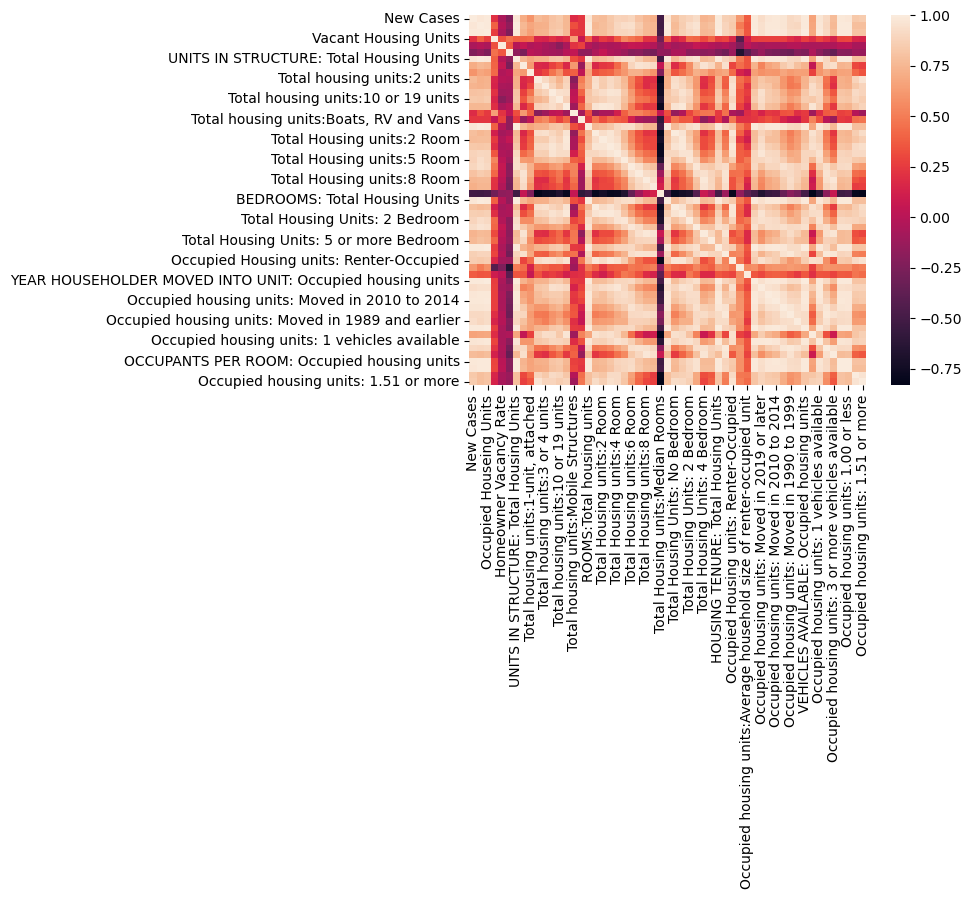

In [19]:
import seaborn as sns

sns.heatmap(corr_matrix)#, cmap='coolwarm', annot=True)
plt.show()

### TASK 3
Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.

- There is a significant posiitve relation between the number of houses occupied and the number of new COVID cases, so the question can be:<br> 
_Does higher the occupied houses indicate more number of COVID Cases reported in the state of New Jersey?_<br><br>
 
- There is a significant rise in positive relation for the number of bedrooms and new cases and then slight decline as the bedreems increase, so the question can be: <br>
_Does the higher the number of rooms in a house tell us the increase in COVID cases for the state of New Jersey, and why there may a decrease in cases for higher number of rooms?_<br><br>

- There is a significant decrease in positive relation for the number of vehicles owned by the people in the houses and the new cases in the state of New Jersey, so this raises the question:<br>
_If a Household has more cars, then does that mean that if more poeple take different cars for travel, so that the transmission of the virus be minimum?_<br><br>

- There is a significant decrease in positive relation between the number of occupants per room in a house to the number of cases in the state, so this raises the question:<br>
_If more people are occupying the rooms in the house, then if one person gets the virus they isolate and all the other people of that house may isolate too, potentially decreasing the spread of the virus?_

